Iris Flower Classification is one of the most popular case studies among the data science community. Almost every data science newbie has solved this case study once in their life. Here, we are given the measurements associated with each species of iris flower and based on this data, we have to train a machine learning model for the task of classifying iris flowers. 

##### Iris Flower Classification

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that we have the measurements of the iris flowers according to their species, and here our task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [1]:
# Import all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

In [2]:
# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['species']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'species']
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# finding the number of missing values in the data set using .isnull().sum()

iris_df.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
species      0
dtype: int64

We can see that the dataset does not have any nan values.

In [4]:
# let’s have a look at the descriptive statistics of this dataset:

iris_df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The target labels of this dataset are present in the species column, let’s have a quick look at the target labels:

In [5]:
print("Target Labels", iris_df["species"].unique())

Target Labels [0 1 2]


Here the values [0 1 2] represent three species  [ 'Iris-setosa'  , 'Iris-versicolor'  , 'Iris-virginica' ] respectively

We will now plot the data using a scatter plot which will plot the iris species according to the sepal length and sepal width:

<AxesSubplot:xlabel='sepal_wid', ylabel='sepal_len'>

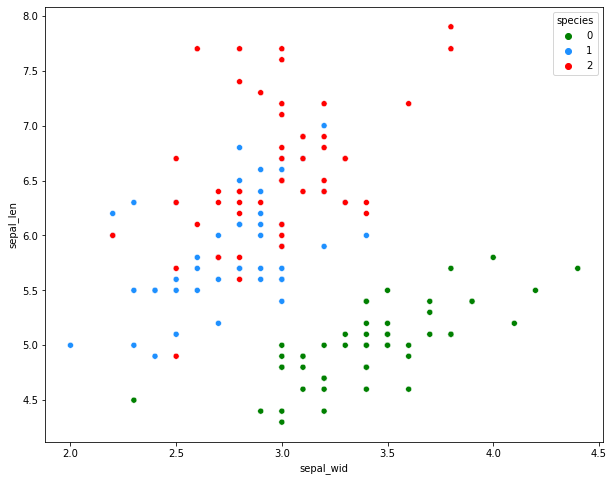

In [6]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,8

sns.scatterplot(data = iris_df, x="sepal_wid",y="sepal_len", hue="species",palette=['green','dodgerblue','red'], legend='full')

In the above plot,  
0 = 'Iris-setosa' 
1 = 'Iris-versicolor'
2 = 'Iris-virginica'

We will now plot the data using a scatter plot which will plot the iris species according to the petal_len and sepal_wid:

<AxesSubplot:xlabel='sepal_wid', ylabel='petal_len'>

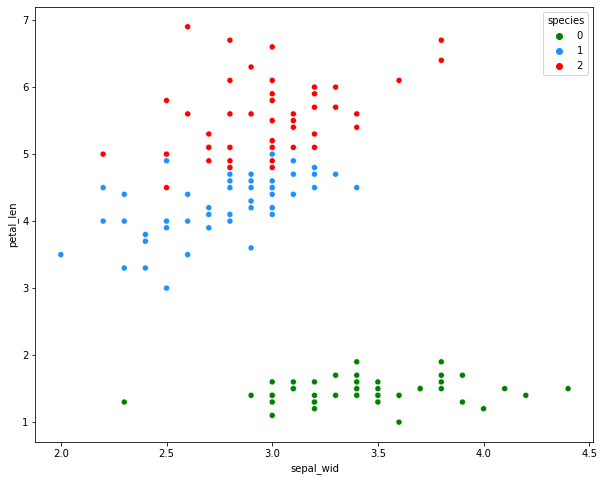

In [7]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,8
sns.scatterplot(data = iris_df, x="sepal_wid",y="petal_len", hue="species",palette=['green','dodgerblue','red'], legend='full')

We will now plot the data using a scatter plot which will plot the iris species according to the petal_wid and sepal_len:

<AxesSubplot:xlabel='petal_wid', ylabel='sepal_len'>

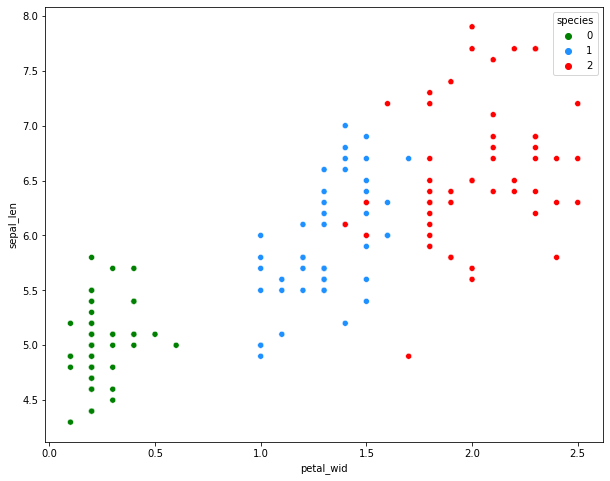

In [8]:
sns.scatterplot(data = iris_df, x="petal_wid",y="sepal_len", hue="species",palette=['green','dodgerblue','red'], legend='full')

We will now train a machine learning model for the task of classifying iris species. Here, we will first split the data into training and test sets, and then we will use the KNN classification algorithm to train the iris classification model.

In [9]:
# Splitting of dataset 
x = iris_df.drop("species", axis=1)

# Using map function to replace the numerical values([0 1 2]) with feature names [ 'Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica' ]

y = iris_df["species"].map({0:'Iris-setosa',1 : 'Iris-versicolor',2 : 'Iris-virginica'})
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train.values, y_train)

KNeighborsClassifier(n_neighbors=1)

We will now input a set of measurements of the iris flower and use the model to predict the iris species

In [11]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']
